# The classification goal : 
Predict if the client will subscribe (yes/no) a term deposit (variable y).

There has been a revenue decline in the Portuguese Bank and they would like to know what actions to take. After investigation, they found that the root cause was that their customers are not investing enough for long term deposits. So the bank would like to identify existing customers that have a higher chance to subscribe for a long term deposit and focus marketing efforts on such customers

# Importing the necessary libraries and loading the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv('C:/Users/Dell/Downloads/Mini Project 2/new_train.csv')

In [3]:
df_test=pd.read_csv('C:/Users/Dell/Downloads/Mini Project 2/new_test.csv')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


In [5]:
df_train.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          8238 non-null   int64
 1   job          8238 non-null   int64
 2   marital      8238 non-null   int64
 3   education    8238 non-null   int64
 4   default      8238 non-null   int64
 5   housing      8238 non-null   int64
 6   loan         8238 non-null   int64
 7   contact      8238 non-null   int64
 8   month        8238 non-null   int64
 9   day_of_week  8238 non-null   int64
 10  duration     8238 non-null   int64
 11  campaign     8238 non-null   int64
 12  poutcome     8238 non-null   int64
dtypes: int64(13)
memory usage: 836.8 KB


In [7]:
df_copy=df_train.copy()

In [8]:
df_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no


In [9]:
df_test.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1


# Data Cleaning
checking for null values, duplicates and removing them

In [10]:
df_test['poutcome'].unique()

array([1, 0, 2], dtype=int64)

In [11]:
df_train.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [12]:
df_train.duplicated().sum()

8

In [13]:
df_train.drop_duplicates(inplace=True)

converting data into numerical categorical values for our analysis

In [14]:
df_train['job'].value_counts()

admin.           8312
blue-collar      7440
technician       5398
services         3195
management       2345
retired          1364
entrepreneur     1160
self-employed    1099
housemaid         855
unemployed        798
student           711
unknown           265
Name: job, dtype: int64

In [15]:
df_train['job'] = df_train['job'].map({'admin.' : 0,
                                     'blue-collar' : 1,
                                     'technician' : 2,
                                     'services' : 3,
                                     'management' : 4,
                                     'retired' : 5,
                                     'entrepreneur' : 6,
                                     'self-employed' : 7,
                                     'housemaid' : 8,
                                     'unemployed' : 9,
                                     'student' : 10,
                                     'unknown' : 11})
df_train['job'].unique()

array([ 1,  6,  5,  0, 10,  3,  2,  7,  4,  9, 11,  8], dtype=int64)

In [16]:
df_train['marital'].value_counts()

married     19947
single       9256
divorced     3674
unknown        65
Name: marital, dtype: int64

In [17]:
df_train['marital'] = df_train['marital'].map({'married' : 0,
                                               'single' : 1,
                                               'divorced' : 2,
                                               'unknown' : 3})

df_train['marital'].unique()

array([0, 2, 1, 3], dtype=int64)

In [18]:
df_train['education'].value_counts()

university.degree      9733
high.school            7594
basic.9y               4826
professional.course    4191
basic.4y               3322
basic.6y               1864
unknown                1396
illiterate               16
Name: education, dtype: int64

In [19]:
df_train['education'] = df_train['education'].map({'high.school' : 0,
                                                   'university.degree' : 1,
                                                   'professional.course' : 2,
                                                   'basic.4y' : 3,
                                                   'basic.6y' : 4,
                                                   'basic.9y' : 5,
                                                   'unknown' : 6,
                                                   'illiterate' : 7
                                                   })

df_train['education'].unique()

array([5, 1, 3, 0, 2, 6, 4, 7], dtype=int64)

In [20]:
df_train['default'].value_counts()

no         26000
unknown     6939
yes            3
Name: default, dtype: int64

In [21]:

df_train['default'] = df_train['default'].map({'no' : 0,
                                               'yes' : 1,
                                               'unknown' : 2
                                               })

df_train['default'].unique()

array([2, 0, 1], dtype=int64)

In [22]:
df_train['housing'].value_counts()

yes        17251
no         14895
unknown      796
Name: housing, dtype: int64

In [23]:
df_train['housing'] = df_train['housing'].map({'no' : 0,
                                               'yes' : 1,
                                               'unknown' : 2
                                               })

df_train['housing'].unique()

array([0, 1, 2], dtype=int64)

In [24]:
df_train['loan'].value_counts()

no         27123
yes         5023
unknown      796
Name: loan, dtype: int64

In [25]:
df_train['loan'] = df_train['loan'].map({'no' : 0,
                                         'yes' : 1,
                                         'unknown' : 2
                                        })

df_train['loan'].unique()

array([0, 1, 2], dtype=int64)

In [26]:
df_train['contact'].value_counts()

cellular     20903
telephone    12039
Name: contact, dtype: int64

In [27]:
df_train['contact'] = df_train['contact'].map({'telephone' : 0,
                                               'cellular' : 1
                                               })

df_train['contact'].unique()

array([1, 0], dtype=int64)

In [28]:
df_train['month'].value_counts()

may    11009
jul     5761
aug     4946
jun     4247
nov     3265
apr     2085
oct      586
sep      464
mar      436
dec      143
Name: month, dtype: int64

In [29]:
df_train['month'] = df_train['month'].map({'mar' : 3,
                                           'apr' : 4,
                                           'may' : 5,
                                           'jun' : 6,
                                           'jul' : 7,
                                           'aug' : 8,
                                           'sep' : 9,
                                           'oct' : 10,
                                           'nov' : 11,
                                           'dec' : 12
                                           })

df_train['month'].unique()

array([11,  7,  5,  6,  8,  3, 10,  4,  9, 12], dtype=int64)

In [30]:
df_train['day_of_week'].value_counts()

thu    6854
mon    6811
wed    6515
tue    6441
fri    6321
Name: day_of_week, dtype: int64

In [31]:
df_train['day_of_week'] = df_train['day_of_week'].map({'mon' : 0,
                                                       'tue' : 1,
                                                       'wed' : 2,
                                                       'thu' : 3,
                                                       'fri' : 4
                                                      })
df_train['day_of_week'].unique()

array([2, 0, 1, 4, 3], dtype=int64)

In [32]:
df_train['poutcome'].value_counts()

nonexistent    28408
failure         3429
success         1105
Name: poutcome, dtype: int64

In [33]:
df_train['poutcome'] = df_train['poutcome'].map({'nonexistent' : 2,
                                                 'success' : 1,
                                                 'failure' : 0
                                                 })

df_train['poutcome'].unique()

array([2, 0, 1], dtype=int64)

In [34]:
df_train['y'].value_counts()

no     29230
yes     3712
Name: y, dtype: int64

In [35]:
df_train['y'] = df_train['y'].map({'no' : 0,
                                   'yes' : 1
                                  })

df_train['y'].unique()

array([0, 1], dtype=int64)

In [36]:
df_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,1,0,5,2,0,0,1,11,2,227,4,999,0,2,0
1,37,6,0,1,0,0,0,0,11,2,202,2,999,1,0,0
2,78,5,0,3,0,0,0,1,7,0,1148,1,999,0,2,1
3,36,0,0,1,0,1,0,0,5,0,120,2,999,0,2,0
4,59,5,2,1,0,0,0,1,6,1,368,2,999,0,2,0


# Data all cleaned and prepared !

In [37]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32942 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          32942 non-null  int64
 1   job          32942 non-null  int64
 2   marital      32942 non-null  int64
 3   education    32942 non-null  int64
 4   default      32942 non-null  int64
 5   housing      32942 non-null  int64
 6   loan         32942 non-null  int64
 7   contact      32942 non-null  int64
 8   month        32942 non-null  int64
 9   day_of_week  32942 non-null  int64
 10  duration     32942 non-null  int64
 11  campaign     32942 non-null  int64
 12  pdays        32942 non-null  int64
 13  previous     32942 non-null  int64
 14  poutcome     32942 non-null  int64
 15  y            32942 non-null  int64
dtypes: int64(16)
memory usage: 4.3 MB


In [38]:
df_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,1,0,5,2,0,0,1,11,2,227,4,999,0,2,0
1,37,6,0,1,0,0,0,0,11,2,202,2,999,1,0,0
2,78,5,0,3,0,0,0,1,7,0,1148,1,999,0,2,1
3,36,0,0,1,0,1,0,0,5,0,120,2,999,0,2,0
4,59,5,2,1,0,0,0,1,6,1,368,2,999,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,3,1,0,0,1,0,1,7,1,192,1,999,0,2,0
32946,52,2,0,2,0,1,0,1,11,4,64,1,999,1,0,0
32947,54,0,0,5,0,0,1,1,7,0,131,4,999,0,2,0
32948,29,0,0,1,0,0,0,0,5,4,165,1,999,0,2,0


# Conducting EDA :

# Correlation Matrix

<AxesSubplot:>

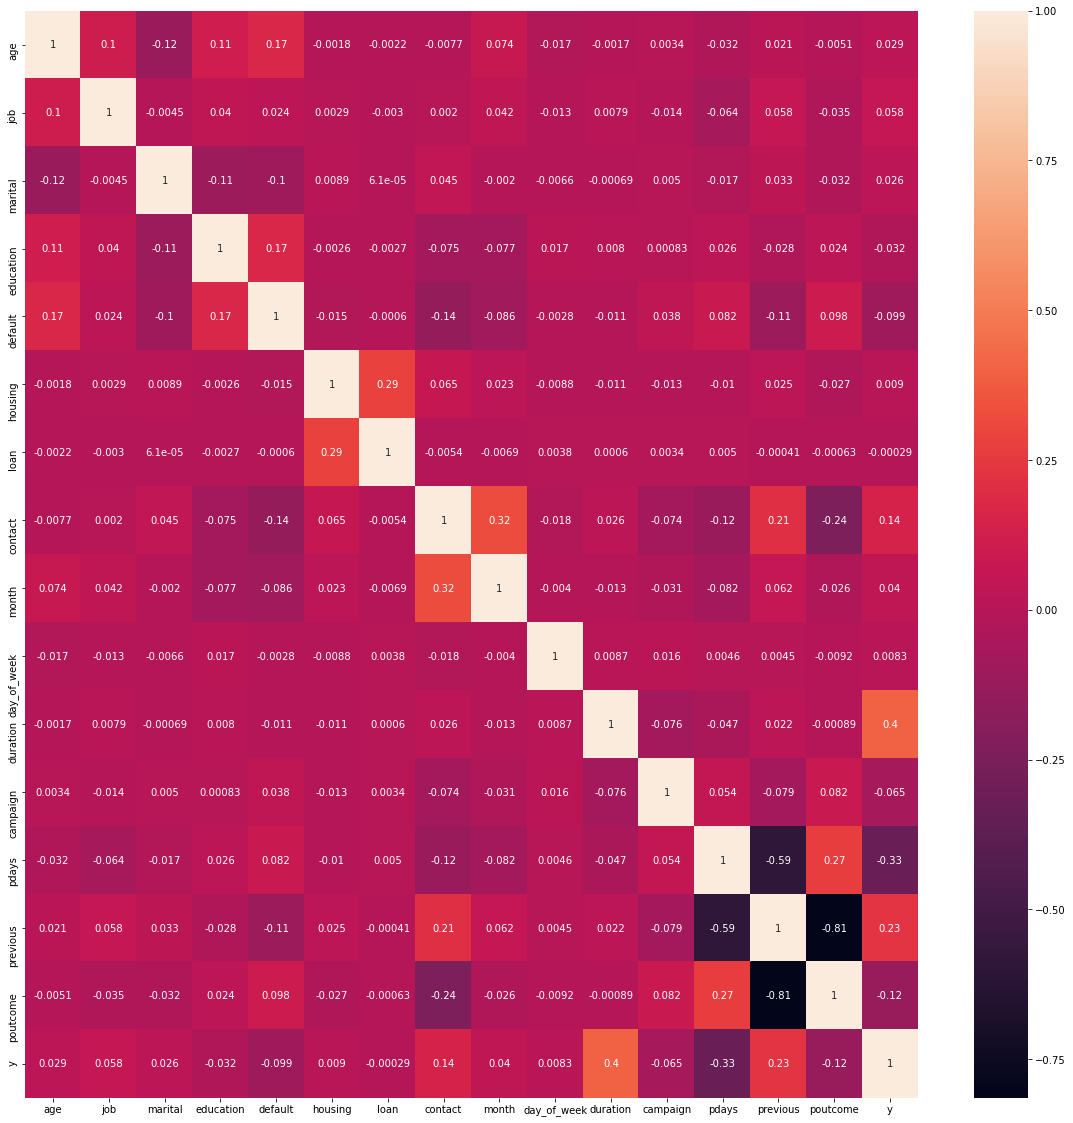

In [39]:
corrmatrix= df_train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corrmatrix,annot=True)

Not very highly correlated features present

# Splitting the dataset into our independent variables and dependent variable

In [40]:
# Target variable (y)
y = df_train[['y']]
y
# Features (X) are all columns except the target variable 'y'
X = df_train[['age','job','marital','education','default','housing','loan','contact','month','day_of_week','duration','campaign','poutcome']]
#X=df_train.drop(['y'],axis=1)



In [41]:
df_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,1,0,5,2,0,0,1,11,2,227,4,999,0,2,0
1,37,6,0,1,0,0,0,0,11,2,202,2,999,1,0,0
2,78,5,0,3,0,0,0,1,7,0,1148,1,999,0,2,1
3,36,0,0,1,0,1,0,0,5,0,120,2,999,0,2,0
4,59,5,2,1,0,0,0,1,6,1,368,2,999,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,3,1,0,0,1,0,1,7,1,192,1,999,0,2,0
32946,52,2,0,2,0,1,0,1,11,4,64,1,999,1,0,0
32947,54,0,0,5,0,0,1,1,7,0,131,4,999,0,2,0
32948,29,0,0,1,0,0,0,0,5,4,165,1,999,0,2,0


In [42]:
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,49,1,0,5,2,0,0,1,11,2,227,4,2
1,37,6,0,1,0,0,0,0,11,2,202,2,0
2,78,5,0,3,0,0,0,1,7,0,1148,1,2
3,36,0,0,1,0,1,0,0,5,0,120,2,2
4,59,5,2,1,0,0,0,1,6,1,368,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,3,1,0,0,1,0,1,7,1,192,1,2
32946,52,2,0,2,0,1,0,1,11,4,64,1,0
32947,54,0,0,5,0,0,1,1,7,0,131,4,2
32948,29,0,0,1,0,0,0,0,5,4,165,1,2


In [43]:
y

,y
0,0
1,0
2,1
3,0
4,0
...,...
32945,0
32946,0
32947,0
32948,0


In [44]:
df_train.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
count,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000,32942.000000
mean,40.012810,2.511110,0.509957,2.068939,0.421377,0.572005,0.200807,0.634539,6.609708,1.982788,258.159614,2.560804,962.043440,0.174762,1.758272,0.112683
std,10.403035,2.698198,0.696285,1.883821,0.815552,0.541435,0.456966,0.481566,2.038584,1.413475,258.995259,2.752579,187.973035,0.499078,0.625693,0.316210
min,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,103.000000,1.000000,999.000000,0.000000,2.000000,0.000000
50%,38.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,6.000000,2.000000,180.000000,2.000000,999.000000,0.000000,2.000000,0.000000
75%,47.000000,4.000000,1.000000,3.000000,0.000000,1.000000,0.000000,1.000000,8.000000,3.000000,319.000000,3.000000,999.000000,0.000000,2.000000,0.000000
max,98.000000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,12.000000,4.000000,4918.000000,56.000000,999.000000,7.000000,2.000000,1.000000


# Importing necessary libraries for our EDA

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,plot_roc_curve,plot_precision_recall_curve


In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
#y_train = np.ravel(y_train)
model = RandomForestClassifier()
model.fit(X_train, y_train)

<ipython-input-47-fd75fb1f6674>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


RandomForestClassifier()

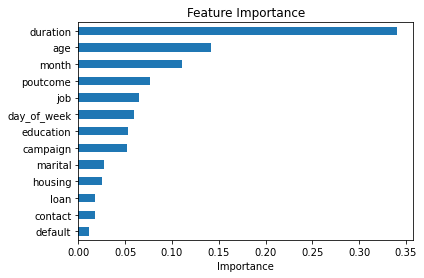

In [48]:
# 4. Feature Importance Plot
feature_importance = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importance.sort_values().plot(kind="barh")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.show()

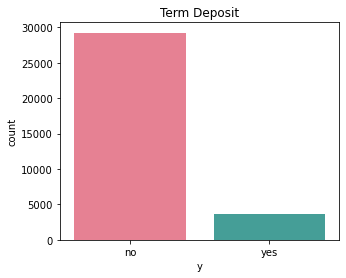

no     88.734446
yes    11.265554
Name: y, dtype: float64

In [49]:
plt.figure(figsize=(5,4))
ax = sns.countplot(data=df_copy, x="y", palette="husl")
# Add title
plt.title("Term Deposit")
plt.show()
per = df_copy['y'].value_counts()/len(df_copy['y'])*100
per

In [50]:
df_train.duration.min()

0

In [51]:
df_train.duration.max()

4918

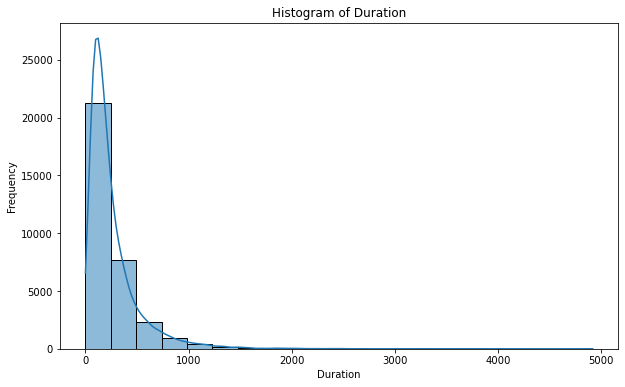

In [71]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['duration'], bins=20, kde=True)
plt.title('Histogram of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

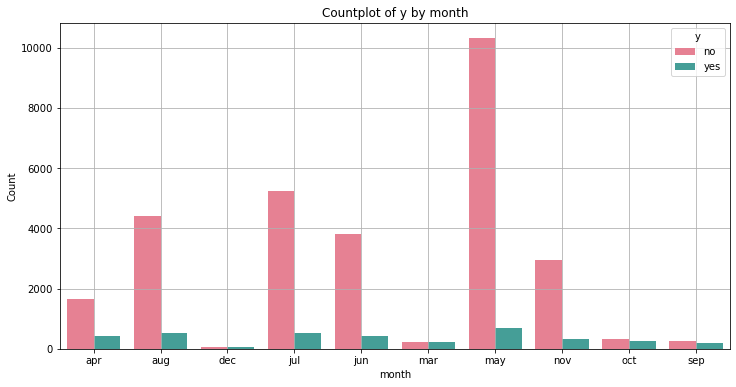

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a cross-tabulation
cross_tab = pd.crosstab(df_copy.month, df_copy.y)

# Reset index to make 'age' a column again
cross_tab = cross_tab.reset_index()

# Melt the DataFrame to make it suitable for Seaborn
cross_tab_melted = cross_tab.melt(id_vars='month', var_name='y', value_name='count')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=cross_tab_melted, x='month', y='count', hue='y', palette='husl', saturation=0.75)
plt.title('Countplot of y by month')
plt.xlabel('month')
plt.ylabel('Count')
plt.legend(title='y')
plt.grid(True)
plt.show()


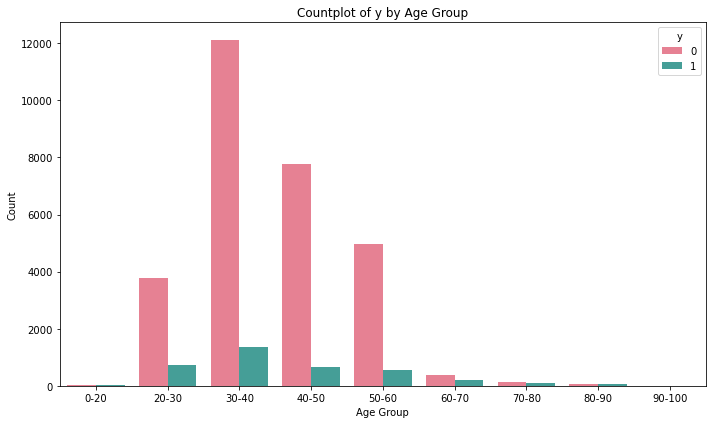

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create bins for age
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df_train['age_group'] = pd.cut(df_train['age'], bins=bins, labels=labels, right=False)

# Plot the counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df_train, x='age_group', hue='y', palette='husl')

# Customize the plot
plt.title('Countplot of y by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='y')

# Show the plot
plt.tight_layout()
plt.show()


In [55]:
y_train = np.ravel(y_train)
from sklearn.feature_selection import SelectFromModel

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Print the feature importances
feature_importances = clf.feature_importances_
print("Feature Importances:", feature_importances)

# Select features based on importance
sfm = SelectFromModel(clf, threshold=0.2)
sfm.fit(X_train, y_train)

# Transform the training set
X_train_selected = sfm.transform(X_train)

# Transform the test set
X_test_selected = sfm.transform(X_test)

# Train a new classifier using the selected features
clf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
clf_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = clf_selected.predict(X_test_selected)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with selected features:", accuracy)


Feature Importances: [0.14326238 0.06462273 0.02746759 0.05213864 0.01147328 0.02672906
 0.01842855 0.01853554 0.11253157 0.05902369 0.34063188 0.05153972
 0.07361538]
Accuracy with selected features: 0.8855668538473213


In [56]:
feature_importances

array([0.14326238, 0.06462273, 0.02746759, 0.05213864, 0.01147328,
       0.02672906, 0.01842855, 0.01853554, 0.11253157, 0.05902369,
       0.34063188, 0.05153972, 0.07361538])

In [57]:
X_train.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'poutcome']

In [58]:
a=0
for i in feature_importances:
    print((X_train.columns.tolist())[a],':',i)
    a+=1 
    if a==len(feature_importances):
        break
    
X.columns

age : 0.1432623794753714
job : 0.064622726411715
marital : 0.02746758757357359
education : 0.052138641817606024
default : 0.011473276289140326
housing : 0.026729063628005867
loan : 0.018428550947463502
contact : 0.01853553572865801
month : 0.11253156678115707
day_of_week : 0.059023688868113454
duration : 0.3406318825857843
campaign : 0.05153971683508148
poutcome : 0.07361538305833


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome'],
      dtype='object')

In [59]:
co=feature_importances[feature_importances>0.1]
co

array([0.14326238, 0.11253157, 0.34063188])

Age Month and Duration are the most important features 

# Model Training

Firstly we will conduct model selection for the best performing model for our dataset

In [60]:
classifiers=[]
classifiers.append(('LR',LogisticRegression()))
classifiers.append(('KNC',KNeighborsClassifier()))
classifiers.append(('RF',RandomForestClassifier()))
classifiers.append(('GNB',GaussianNB()))
classifiers.append(('GBC',GradientBoostingClassifier()))
results=[]
names=[]

In [61]:
X = df_train[['age','month','duration']]

In [62]:
classifiers

[('LR', LogisticRegression()),
 ('KNC', KNeighborsClassifier()),
 ('RF', RandomForestClassifier()),
 ('GNB', GaussianNB()),
 ('GBC', GradientBoostingClassifier())]

In [63]:
scoring='precision'
kfold=KFold(n_splits=10)
y = y.values.ravel()
for name,model in classifiers:
 cv_results=cross_val_score(model,X,y,cv=kfold,scoring=scoring)
 results.append(cv_results)
 names.append(name)
 print(cv_results)
 precision_scores = cv_results  # Convert negative MSE scores to positive
 mean_precision = np.mean(precision_scores)
 mean_precision_results=[]
 mean_precision_results.append((name,mean_precision))
 print(f"{name}: Mean Precision: {mean_precision:.4f}\n")

[0.57575758 0.51648352 0.60204082 0.61904762 0.54285714 0.6
 0.56097561 0.56756757 0.60215054 0.6122449 ]
LR: Mean Precision: 0.5799

[0.46666667 0.48648649 0.52906977 0.47282609 0.44897959 0.48356808
 0.45320197 0.48717949 0.43434343 0.50537634]
KNC: Mean Precision: 0.4768

[0.44827586 0.39202658 0.52013423 0.50501672 0.44590164 0.46209386
 0.44210526 0.47857143 0.46258503 0.52145215]
RF: Mean Precision: 0.4678

[0.50761421 0.5        0.55737705 0.59241706 0.51456311 0.53333333
 0.53023256 0.52752294 0.54787234 0.57211538]
GNB: Mean Precision: 0.5383

[0.63942308 0.54210526 0.69318182 0.64248705 0.55909091 0.57711443
 0.53301887 0.59       0.58638743 0.60386473]
GBC: Mean Precision: 0.5967



In [64]:
# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
# Loop through classifiers and evaluate them
for clf_name, clf_model in classifiers:
    clf_scores = cross_val_score(clf_model, X, y, cv=kf)
    clf_accuracy = clf_scores.mean()
    print(f'{clf_name} Mean Accuracy: {clf_accuracy:.2f}\n')

LR Mean Accuracy: 0.89

KNC Mean Accuracy: 0.89

RF Mean Accuracy: 0.88

GNB Mean Accuracy: 0.89

GBC Mean Accuracy: 0.90



Gradient Boosting Accuracy: 0.90

Confusion Matrix:
[[5658  157]
 [ 487  287]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5815
           1       0.65      0.37      0.47       774

    accuracy                           0.90      6589
   macro avg       0.78      0.67      0.71      6589
weighted avg       0.89      0.90      0.89      6589



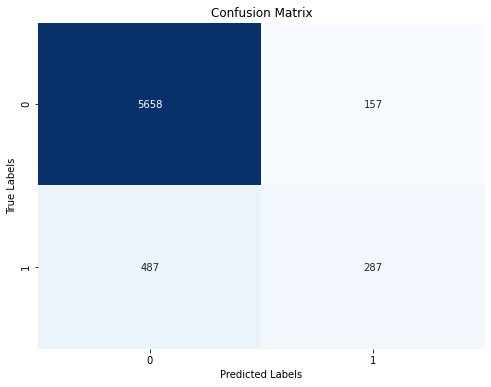

In [65]:
y_train = np.ravel(y_train)
# Initialize the GradientBoostingClassifier
gradient_boost_model = GradientBoostingClassifier()

# Train the model on the training data
gradient_boost_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gradient_boost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Gradient Boosting Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

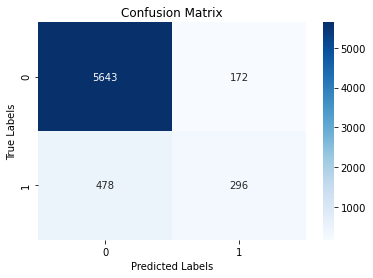

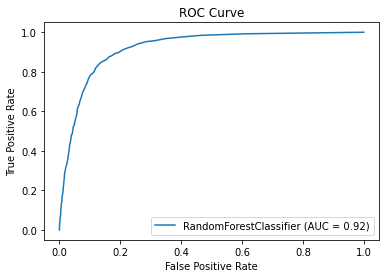

In [66]:
y_train = np.ravel(y_train)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# 1. Confusion Matrix
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# 2. ROC Curve
plot_roc_curve(clf, X_test, y_test)
plt.title("ROC Curve")
plt.show()



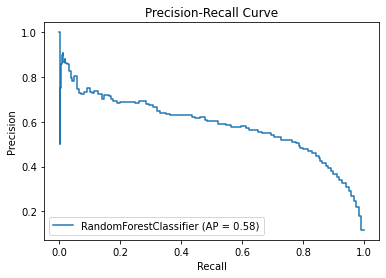

In [67]:
# 3. Precision-Recall Curve
plot_precision_recall_curve(clf, X_test, y_test)
plt.title("Precision-Recall Curve")
plt.show()



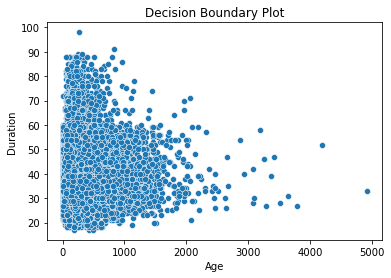

In [75]:

# 5. Decision Boundary Plot
sns.scatterplot(x=X['duration'],y=X["age"])
plt.title("Decision Boundary Plot")
plt.xlabel("Age")
plt.ylabel("Duration")
plt.show()

In [69]:
X.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 32942 entries, 0 to 32949
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       32942 non-null  int64
 1   month     32942 non-null  int64
 2   duration  32942 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


In [70]:
df_train



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y,age_group
0,49,1,0,5,2,0,0,1,11,2,227,4,999,0,2,0,40-50
1,37,6,0,1,0,0,0,0,11,2,202,2,999,1,0,0,30-40
2,78,5,0,3,0,0,0,1,7,0,1148,1,999,0,2,1,70-80
3,36,0,0,1,0,1,0,0,5,0,120,2,999,0,2,0,30-40
4,59,5,2,1,0,0,0,1,6,1,368,2,999,0,2,0,50-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,3,1,0,0,1,0,1,7,1,192,1,999,0,2,0,20-30
32946,52,2,0,2,0,1,0,1,11,4,64,1,999,1,0,0,50-60
32947,54,0,0,5,0,0,1,1,7,0,131,4,999,0,2,0,50-60
32948,29,0,0,1,0,0,0,0,5,4,165,1,999,0,2,0,20-30
